In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [70]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_3 = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

In [71]:
y_bin = sigungu.iloc[:,-7:] #등급(binary) - 15년, 14년도 
y_deci = sigungu_3.iloc[:,-7:] #등급(1-5) - 15년
X = sigungu.iloc[:,4:-7] #독립변수X - 15년 
name = sigungu.iloc[:,:4] #이름 - 15년
y_bin.columns = ['fire','transport','disaster','crime','accident','suicide','infection']

# 전국 산업단지(2015)

In [129]:
전국산업단지 = pd.read_csv(path+'전국산업단지현황_정지연.csv', encoding='cp949')
신규산업단지 = pd.read_csv(path+'신규지정산업단지_정지연.csv', encoding='cp949')

In [130]:
전국산업단지 = 전국산업단지.loc[(전국산업단지.조성상태=='완료')&(전국산업단지['고용현황(계)']!='0')]
전국산업단지.분양률 = 전국산업단지.분양률.astype(np.int64)

In [131]:
#분양률 90이상으로 선정한 이유
# len(전국산업단지.loc[전국산업단지.분양률>=90])

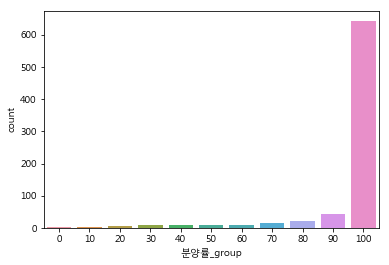

In [132]:
import seaborn as sns
전국산업단지['분양률_group']=전국산업단지.분양률.apply(lambda x : x//10*10)
sns.countplot(x='분양률_group', data=전국산업단지)

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


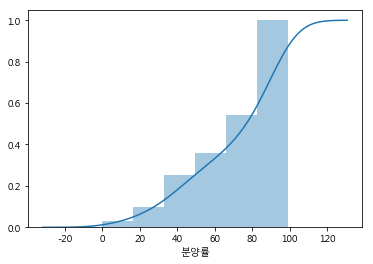

In [133]:
#이외지역에서 누적그래프를 그리니
분양률non100= 전국산업단지.loc[전국산업단지['분양률']!=100]
sns.distplot(분양률non100.분양률, hist_kws=dict(cumulative=True),kde_kws=dict(cumulative=True))

In [134]:
전국산업단지 = 전국산업단지.loc[(전국산업단지.조성상태=='완료')&(전국산업단지['고용현황(계)']!='0')
                    &(전국산업단지.분양률>=90)]

In [136]:
전국산업단지

,유형,시도,시군,단지명,조성상태,지정면적,관리면적,전체면적,분양대상,분양,미분양,분양률,입주업체,가동업체,고용현황(남),고용현황(여),고용현황(계),누계생산(백만원),누계수출(천달러),분양률_group
0,국가,서울,구로구,한국수출산업,완료,1922,1922,1446,1446,1446,0,100,9832,8732,107930,44088,152018,3098185,556371,100
1,국가,서울,구로구,서울디지탈,완료,1922,1922,1446,1446,1446,0,100,9832,8732,107930,44088,152018,3098185,556371,100
2,국가,부산,강서구,"명지,녹산",완료,8841,8814,4317,4317,4317,0,100,1549,1466,26597,7011,33608,2425535,553611,100
4,국가,부산,강서구,녹산지구(산업단지),완료,6998,6971,4317,4317,4317,0,100,1549,1466,26597,7011,33608,2425535,553611,100
5,국가,인천,남동구,남동,완료,9574,9574,5913,5913,5913,0,100,6779,6653,77994,26249,104243,6042760,722610,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,농공,경남,합천군,적중,완료,94,94,79,79,79,0,100,6,2,x,x,x,x,0,100
1203,농공,경남,함양군,함양중방전문,완료,99,99,61,61,61,0,100,6,1,x,x,x,x,0,100
1207,농공,제주,서귀포시,대정,완료,115,115,94,94,94,0,100,22,20,153,45,198,15588,486,100
1208,농공,제주,제주시,구좌,완료,67,67,49,49,49,0,100,18,16,109,73,182,7493,0,100


# 외부교통자료

In [137]:
가해운전자연령층별 = pd.read_csv(path+'도로교통공단_시도_시군구별_가해운전자_연령층별_교통사고(2015).csv', encoding='cp949')
도로형태별 = pd.read_csv(path+'도로교통공단_시도_시군구별_도로형태별_교통사고(2015).csv', encoding='cp949')
사고유형별 = pd.read_csv(path+'도로교통공단_시도_시군구별_사고유형별_교통사고(2015).csv', encoding='cp949')
시간대별 = pd.read_csv(path+'도로교통공단_시도_시군구별_시간대별_교통사고(2015).csv', encoding='cp949')
월별 = pd.read_csv(path+'도로교통공단_시도_시군구별_월별_교통사고(2015).csv', encoding='cp949')

In [139]:
시간대별

,시도,시군구,시간대,발생건수,사망자수,부상자수,중상,경상,부상신고
0,서울,종로구,00시-02시,113,3,178,40,119,19
1,서울,종로구,02시-04시,73,0,114,29,63,22
2,서울,종로구,04시-06시,48,0,55,22,22,11
3,서울,종로구,06시-08시,88,1,123,32,79,12
4,서울,종로구,08시-10시,110,1,148,34,96,18
...,...,...,...,...,...,...,...,...,...
2717,세종,세종,14시-16시,49,2,72,22,48,2
2718,세종,세종,16시-18시,61,1,92,44,45,3
2719,세종,세종,18시-20시,65,3,96,31,59,6
2720,세종,세종,20시-22시,48,1,86,28,50,8
